<a href="https://colab.research.google.com/github/m1key/keras-sandbox/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [2]:
len(test_data)

2246

In [3]:
len(train_data)

8982

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[10])

[0. 1. 0. ... 0. 0. 0.]


In [14]:
# One hot encoding aka categorical encoding.

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print(train_labels[10])
print(one_hot_train_labels[10])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
# Or there's a built-in way of doing it in Keras.

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(one_hot_train_labels[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 221us/step - loss: 2.4904 - acc: 0.4937 - val_loss: 1.6727 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.3845 - acc: 0.7061 - val_loss: 1.2747 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.0446 - acc: 0.7722 - val_loss: 1.1155 - val_acc: 0.7630
Epoch 4/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.8223 - acc: 0.8294 - val_loss: 1.0208 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.6586 - acc: 0.8647 - val_loss: 0.9688 - val_acc: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.5246 - acc: 0.8930 - val_loss: 0.9220 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.4287 - acc: 0.9117 - val_loss: 0.9112 - val_acc: 0.8040


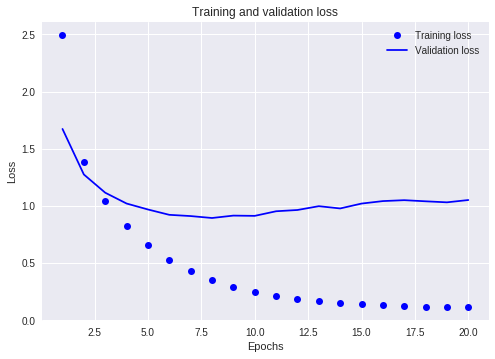

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

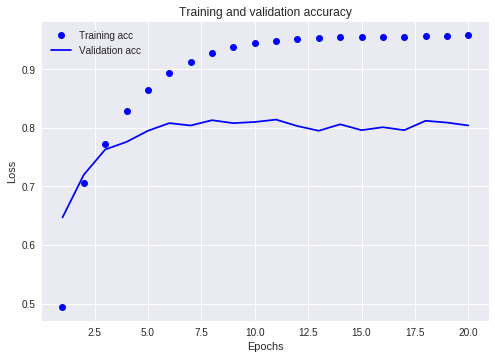

In [28]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 226us/step - loss: 2.5382 - acc: 0.5226 - val_loss: 1.6722 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 172us/step - loss: 1.3705 - acc: 0.7122 - val_loss: 1.2749 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 171us/step - loss: 1.0128 - acc: 0.7795 - val_loss: 1.1349 - val_acc: 0.7480
Epoch 4/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.7975 - acc: 0.8247 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.6391 - acc: 0.8636 - val_loss: 0.9761 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.5113 - acc: 0.8919 - val_loss: 0.9097 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.4109 - acc: 0.9149 - val_loss: 0.8923 - val_acc: 0.8200
Epoch 8

In [30]:
results

[1.024149673917096, 0.7756010686194165]

In [34]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

In [35]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

0.99999994

In [37]:
np.argmax(predictions[0])

3

In [39]:
predictions[0][3]

0.9724363